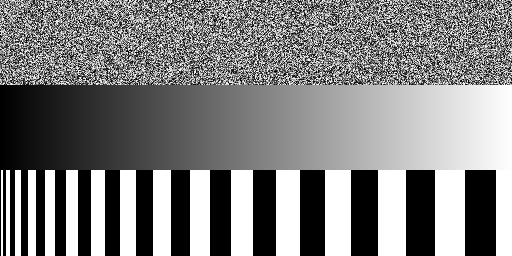

In [1]:
# Lösung 7.1. Bilddatei lesen und speichern
import os
import sys
from IPython.display import display,HTML
from PIL import Image
import numpy as np
################################################################################
# Lesen eines PGM Image-Files in ein Dictionary.
# fileName: Pfad zur PGM-Image-Datei
# return  : dict['magic']: Magic der PGM-Datei
#           dict['width']: Breite des Bildes
#           dict['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           dict['pixels']: numpy.ndarray mit zeilenweisen Graustufen des Bildes
################################################################################
def readPgmImageFile(fileName):
### BEGIN SOLUTION
    
    if (not os.path.exists(fileName)):
        raise FileNotFoundError(f"Datei {fileName} existiert nicht!")
    if (not os.path.isfile(fileName)):
        raise FileNotFoundError(f"Datei {fileName} existiert, ist aber keine Datei!")
    
    image = dict()
    image['pixels'] = None
    image['magic']= None
    image['width']= None
    image['height']= None
    image['maxgray']= None
    pixelCount=0
    with open(fileName, 'r', encoding='ascii') as file:
        image['magic'] = file.readline().strip()
        if image['magic'] != 'P2':
            raise ValueError("Das Bild ist kein PGM-Bild im P2 Format")
        image['width'], image['height'] = map(int, file.readline().strip().split())
        image['maxgray'] = int(file.readline().strip())
        pixels = []
        for line in file:
            pixels.extend(map(int, line.split()))
        pixelCount = len(pixels)
        image['pixels'] = np.array(pixels, dtype=np.uint8).reshape((image['height'], image['width']))   
    # Bild auf Vollständigkeit prüfen
    if image['magic'] is None:
        raise Exception(f"{fileName}: Magic fehlt.")
    if image['width'] is None:
        raise Exception(f"{fileName}: Bildbreite fehlt.")
    if image['height'] is None:
        raise Exception(f"{fileName}: Bildhöhe fehlt.")
    if image['maxgray'] is None:
        raise Exception(f"{fileName}: Maximaler Grauwert fehlt.")
    if image['pixels'] is None:
        raise Exception(f"{fileName}: Keine Grauwerte für Bilder gefunden.")

    # Erwartete und gelesene Bilddimensionen vergleichen
    if (image['width'] * image['height'] != pixelCount):
        raise Exception(f"Erwarte {image['width']} * {image['height']} Pixel-Graustufenwerte, es sind aber {pixCount}")
### END SOLUTION        
    return image # Rückgabe des mit den Bilddaten gefüllten Dictionaries.

################################################################################
# Schreiben eines PGM Image Dictionaries in eine Datei.
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           dict['pixels']: numpy.ndarray mit zeilenweisen Graustufen des Bildes
# fileName: Pfad zur PGM-Image-Datei
################################################################################
def writePgmImageFile(image, fileName):
    try:
### BEGIN SOLUTION
        with open(fileName, 'w', encoding='ascii') as file:
            file.write(f"{image['magic']}\n")
            file.write(f"{image['width']}{image['height']:4d}\n")
            file.write(f"{image['maxgray']}\n")
            for row in image['pixels']:
                for pixel in row:
                    file.write(f"{pixel:4d} ")
                file.write("\n")
### END SOLUTION                
    except PermissionError as e:
        raise OSError(f"Rechte zum Schreiben der Datei {fileName} fehlen")
    except IOError as e:
        raise OSError(f"Fehler bei Schreiben der Datei {fileName}")
### BEGIN SOLUTION
    finally:
        file.close()
### END SOLUTION                
    
###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="dreifach.out.pgm"

    image = readPgmImageFile(infile)
    writePgmImageFile(image, outfile)

    with Image.open(outfile) as i:
	    display(i)
 
except ValueError as e:
    sys.stderr.write("Fehler:\n")
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write("Fehler:\n")
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:\n")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION




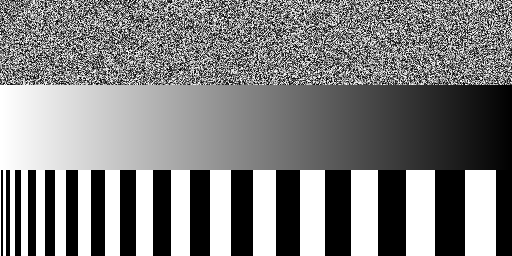

In [ ]:
# Loesung 7.1.1 Invertierung

################################################################################
# Invertieren eines PGM-Bildes
# Erstellen eines neue Dictionary und Initialisieren mit den Metadaten eines 
# übergebenen Dictionary mit den Daten einer PGM Bilddatei entsprechend dem 
# folgenden Format. 
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           image['pixels']: numpy.ndarray mit zeilenweisen Graustufen des Bildes
# return:   Neues Dictionary. 
#           Alle Metadaten des Parameter image werden übernommen. 
#           image['pixels']: 
################################################################################
def invertImage(image):
    result = dict();
### BEGIN SOLUTION
    result['magic']   = image['magic']           # Das Magic aus der Datei ("P2").
    result['width']   = image['width']           # Breite des Bildes in Pixeln.
    result['height']  = image['height']          # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']         # Maximal vorkommender Grauwert.
    
    #
    # Hier passiert das Invertieren: max.Grauwert - 2-dim-numpy-Array
    #
    result['pixels']  = image['maxgray'] - image['pixels'] 
    
### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="inverted.out.pgm"

    image = readPgmImageFile(infile)
    inverted = invertImage(image)
    writePgmImageFile(inverted, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

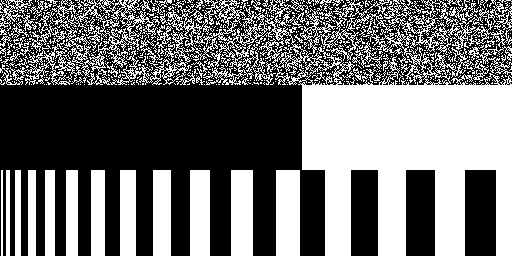

In [3]:
# Loesung 7.1.2 Schwellwert

################################################################################
# Schwellwertbearbeitung eines PGM-Bildes
# Erstellen eines neue Dictionary und Initialisieren mit den Metadaten eines 
# übergebenen Dictionary mit den Daten einer PGM Bilddatei entsprechend dem 
# folgenden Format. 
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           image['pixels']: Liste von Zeilen mit Liste von Pixeln in einer Zeile
# return:   Neues Dictionary. 
#           Alle Metadaten des Parameter image werden übernommen. 
#           Alle result['pixels'][y][x] werden berechnet aus 
#           image['pixels'][y][x] < threshold ? 0 : image['maxgray']
################################################################################
def thresholdImage(image, threshold):
    result = dict();
### BEGIN SOLUTION
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    result['pixels']  = image['pixels'].copy()# Die Pixel des Bildes als Kopie.
    
    result['pixels'][result['pixels'] < threshold] = 0
    result['pixels'][result['pixels'] >= threshold] = 255
### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="threshold.out.pgm"

    image = readPgmImageFile(infile)
    thresholded = thresholdImage(image, 150)
    writePgmImageFile(thresholded, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

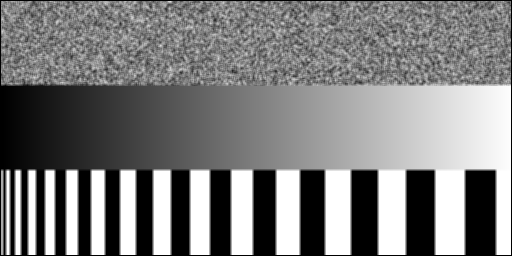

In [4]:
# Loesung 7.1.3 Glaettung
from scipy.ndimage import uniform_filter
################################################################################
# Glätten eines PGM Image Dictionaries
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           image['pixels']: Liste von Zeilen mit Liste von Pixeln in einer Zeile
# return: Geglättete Version des übergebenen PGM Images in einem neuen Dictionary
################################################################################
def smoothedImage(image):
    result = dict();
### BEGIN SOLUTION

# Die Lösung ist wegen sich wiederholenden Codes nicht optimal.
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    
    # Weichzeichnen
    result['pixels']  = uniform_filter(image['pixels'], size=3, mode="nearest")
    
    # Randpixel auf Schwarz setzten
    result['pixels'][[0, -1], :] = 0
    result['pixels'][:, [0, -1]] = 0

### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="smoothed.out.pgm"

    image = readPgmImageFile(infile)
    smoothed = smoothedImage(image)
    writePgmImageFile(smoothed, outfile)

    with Image.open(outfile) as i:
	    display(i)

except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

In [5]:
# Loesung 7.1.4 Kantenerkennung


################################################################################
# Kantenerkennung eines PGM Image Dictionaries
# image:    image['magic']: Magic der PGM-Datei
#           image['width']: Breite des Bildes
#           image['height']: Höhe des Bildes
#           dict['maxgray'] Maximal vorkommender Grauwert.
#           image['pixels']: Liste von Zeilen mit Liste von Pixeln in einer Zeile
# return: Version des übergebenen PGM Images mit Kantenerkennung
################################################################################
def edgetImage(image):
    result = dict();
    
# Kopieren der Metadaten
    result['magic']   = image['magic']        # Das Magic aus der Datei ("P2").
    result['width']   = image['width']        # Breite des Bildes in Pixeln.
    result['height']  = image['height']       # Höhe des Bildes in Pixeln.
    result['maxgray'] = image['maxgray']      # Maximal vorkommender Grauwert.
    
    weights = np.array([
        [0, -1, 0], 
        [-1, 4 ,-1], 
        [0, -1, 0]], 
        dtype=np.float64)
    
    f_img = image['pixels'].astype(np.float64)
    edged = cv2.filter2D(f_img, -1, weights)
    out = np.clip(edged, 0, 255).astype(np.uint8)
    result['pixels'] = out

### END SOLUTION
    return result


###########################################################
# Test
###########################################################
try:
### BEGIN SOLUTION
    infile="cpp1_a7_dreifach.pgm"
    outfile="edged.out.pgm"

    image = readPgmImageFile(infile)
    
    edged = edgetImage(image)
    writePgmImageFile(edged, outfile)

    with Image.open(outfile) as i:
	    display(i)
except ValueError as e:
    sys.stderr.write(str(e))
except OSError as e:
    sys.stderr.write(str(e))
except Exception as e:
    sys.stderr.write("Unerwarteter Fehler:")
    sys.stderr.write(str(e))
    raise e
### END SOLUTION
    

Unerwarteter Fehler:name 'cv2' is not defined

NameError: name 'cv2' is not defined